## Online Shop Sales and Customer Analysis 

### Objective: As a data analyst, analyze customer behavior, revenue trends, payment preferences, and engagement metrics for actionable business insights.



### Stakeholder questions:
---

Customer Behavior & Sales Trends
- How do age and gender impact total sales and purchasing behavior?
- What is the average purchase value per customer segment (age/gender)?
- What percentage of customers make repeat purchases, and how much revenue do they generate?
- Which payment method is most commonly used, and which generates the highest revenue?


Marketing & Customer Engagement
- Is there a relationship between time spent on the website and purchase value?  
- Which browsers do high-spending customers use?
- Does newsletter subscription lead to higher customer retention and revenue growth?
- Impact of voucher usage on total revenue? Are voucher users more likely to return? 

Purchase Trends & Seasonal Insights
- How have monthly sales and the number of purchases changed over time?
- Are there any seasonal trends in customer spending?
- Do customers buy more during specific months, days, or times?

### Data Cleaning and Transformation Objectives

#### 🔹 Data Cleaning Objectives:
1. Check for duplicate values.
2. Check for null values.

#### 🔹 Data Transformation Objectives:
1. Standardize column headers for clarity.
2. Map categorical values for Gender, Payment Method, Browser, Newsletter, and Voucher.
3. Convert the 'Purchase_date' column to the correct datetime format.
4. Convert the 'Time_Spent' column from seconds to minutes.

## Data Cleaning:

In [1]:
#Importing necessary libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#We need to read in the csv file
sales = pd.read_csv("Online_sales.csv")

In [3]:
#Get first few rows to check if data has been imported
sales.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0


In [4]:
#To view number of columns versus number of rows
num_rows, num_columns = sales.shape
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

Number of rows: 65796
Number of columns: 12


In [5]:
#We want to view the data types
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65796 entries, 0 to 65795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     65796 non-null  int64  
 1   Age             65796 non-null  int64  
 2   Gender          65796 non-null  int64  
 3   Revenue_Total   65796 non-null  float64
 4   N_Purchases     65796 non-null  int64  
 5   Purchase_DATE   65796 non-null  object 
 6   Purchase_VALUE  65796 non-null  float64
 7   Pay_Method      65796 non-null  int64  
 8   Time_Spent      65796 non-null  int64  
 9   Browser         65796 non-null  int64  
 10  Newsletter      65796 non-null  int64  
 11  Voucher         65796 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 6.0+ MB


### 💡 The Purchase_DATE column is currently stored as an object rather than a datetime format. This should be converted to a proper datetime type during data transformation to enable accurate time-based analysis.
---

## Checking for Duplicates and Null Values:

In [6]:
#We check for duplicate customer values:
dup_cust = sales['Customer_id'].duplicated().sum()

#Printing duplicates:
print(f"Number of duplicate customer records: {dup_cust}")

#Check for any duplicate rows:
duplicate_records = sales[sales.duplicated(subset='Customer_id', keep=False)]
display(duplicate_records)


Number of duplicate customer records: 0


,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher


In [7]:
#Checking for Null Values:
sales.isnull().sum()

Customer_id       0
Age               0
Gender            0
Revenue_Total     0
N_Purchases       0
Purchase_DATE     0
Purchase_VALUE    0
Pay_Method        0
Time_Spent        0
Browser           0
Newsletter        0
Voucher           0
dtype: int64

### The dataset contains no duplicate or null values, ensuring data integrity. We can now proceed with the necessary transformations.










## Data Transformation

### 1. We need to rename column headers for clarity:

In [8]:
new_col = {
    'Customer_id': 'CustId',
    'Age': 'Age',
    'Gender':'Gender',
    'Revenue_Total': 'Total_Revenue',
    'N_Purchases': 'Total_Purchases',
    'Purchase_DATE': 'Last_Purchase_Date',
    'Purchase_VALUE': 'Last_Purchase_Value',
    'Pay_Method': 'Payment_Method',
    'Time_Spent': 'Time_Spent',
    'Browser': 'Browser_Choice',
    'Newsletter': 'Newsletter_Subscription',
    'Voucher': 'Voucher_Usage'
}

sales.rename(columns=new_col, inplace=True)

In [12]:
#Check if the headers have been updated
sales.head()

,CustId,Age,Gender,Total_Revenue,Total_Purchases,Last_Purchase_Date,Last_Purchase_Value,Payment_Method,Time_Spent,Browser_Choice,Newsletter_Subscription,Voucher_Usage
0,504308,53,0,45.3,2,2021-06-22,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,2021-12-10,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,2021-03-14,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,2021-10-25,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,2021-09-14,56.900,1,605,0,1,0


### 2. Converting Purchase_date to the correct data type

In [13]:
# Convert 'Purchase_DATE' to datetime format
sales['Last_Purchase_Date'] = pd.to_datetime(sales['Last_Purchase_Date'], format='%d.%m.%y')

In [14]:
#Checks if the format has been updated correctly
print(sales['Last_Purchase_Date'].dtype)

datetime64[ns]


#### ✅ The Last_Purchase_Date column values have been updated to the correct format

### 3. Mapping Categorical Variables

#### 3.1 Gender Mapping:


In [15]:
# Mapping dictionary for Gender
gender_map = {0: 'Male', 1: 'Female'}

# Apply the map() function to the 'Gender' column
sales['Gender'] = sales['Gender'].map(gender_map)

#### 3.2 Payment Method:

In [16]:
#We want to repeat the same for Payment Methods and update it as:
# 0: Digital Wallets, 1: Card, 2: PayPal, 3: Other

#Create a mapping function
pay_map = {
    0: 'Digital Wallets',
    1: 'Card',
    2: 'PayPal',
    3: 'Other'
}

# Apply the map() function to the payment method column
sales['Payment_Method'] = sales['Payment_Method'].map(pay_map)

#### 3.3 Browser:

In [17]:
# 0: Chrome, 1: Safari, 2: Edge, 3: Other

#Create a mapping function
browser_map = {
    0: 'Chrome',
    1: 'Safari',
    2: 'Edge',
    3: 'Other'
}

# Apply the map() function to the Browser column
sales['Browser_Choice'] = sales['Browser_Choice'].map(browser_map)

#### 3.4 Newsletter Subscription:

In [18]:
# Mapping dictionary for Newsletter Subscription
newsletter_map = {
    0: 'No',
    1: 'Yes'
}

# Apply the map() function to the 'Newsletter_Subscription' column
sales['Newsletter_Subscription'] = sales['Newsletter_Subscription'].map(newsletter_map)


#### 3.5 Voucher_Usage:

In [19]:
# Mapping dictionary for Voucher usage
vouch_map = {
    0: 'No',
    1: 'Yes'
}

# Apply the map() function to the 'Voucher_usage' column
sales['Voucher_Usage'] = sales['Voucher_Usage'].map(vouch_map)


In [20]:
sales.head()

,CustId,Age,Gender,Total_Revenue,Total_Purchases,Last_Purchase_Date,Last_Purchase_Value,Payment_Method,Time_Spent,Browser_Choice,Newsletter_Subscription,Voucher_Usage
0,504308,53,Male,45.3,2,2021-06-22,24.915,Card,885,Chrome,No,No
1,504309,18,Female,36.2,3,2021-12-10,2.896,PayPal,656,Chrome,No,Yes
2,504310,52,Female,10.6,1,2021-03-14,10.600,Digital Wallets,761,Chrome,Yes,No
3,504311,29,Male,54.1,5,2021-10-25,43.280,Card,906,Chrome,Yes,No
4,504312,21,Female,56.9,1,2021-09-14,56.900,Card,605,Chrome,Yes,No


#### ✅ Checked if the values have been mapped correctly:


### 4. Converting Time_Spent from seconds to minutes 

In [21]:
# Convert time spent from seconds to minutes
sales['Time_Spent'] = sales['Time_Spent'] / 60  

# Round to two decimal places
sales['Time_Spent'] = sales['Time_Spent'].round(2)

# Display updated DataFrame
print(sales[['Time_Spent']].head())

   Time_Spent
0       14.75
1       10.93
2       12.68
3       15.10
4       10.08


#### ✅ Successfully converted Time from seconds to minutes for clarity


## Data Visualisation
---

## 1️⃣ Customer Behaviour and Sales Trends

### 1.1 Revenue Distribution by Gender

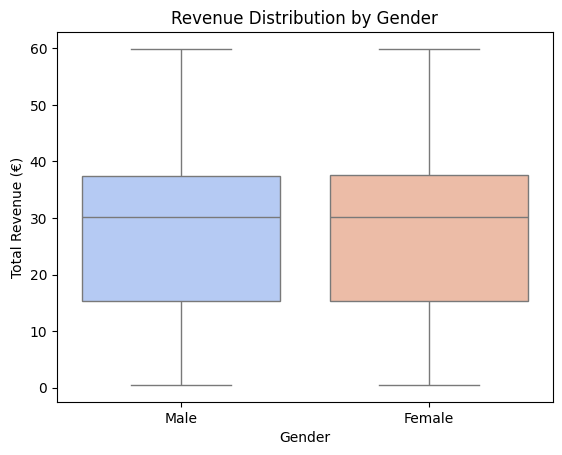

In [43]:
sns.boxplot(x="Gender", y="Total_Revenue", data=sales, hue = "Gender", palette="coolwarm")  
plt.title("Revenue Distribution by Gender")  
plt.xlabel("Gender")  
plt.ylabel("Total Revenue (€)")  
plt.show()


### Insights:
- Gender Does Not Influence Spending – Both genders have similar median revenue and interquartile range (IQR), suggesting they spend in comparable ways.

- Equal Revenue Potential – Since revenue distribution is alike, gender-based targeting may not be a key driver for sales. Instead, focus on customer behavior, product preferences, and engagement levels.

### 1.2 Revenue Distribution by Age

#### Before analyzing the data, we need to categorize the ages into meaninful ranges. This allows for clearer insights and easier comparison across different age groups. We can achieve this by creating a new column that segments ages into predefined ranges.


In [44]:
# Define age bins and labels
bins = [15, 25, 35, 45, 55, 65]  
labels = ["16-25", "26-35", "36-45", "46-55", "56-63"]

# Create a new column for age groups
sales["Age_Group"] = pd.cut(sales["Age"], bins=bins, labels=labels, include_lowest=True)


#### We group the dataset by age groups and calculate total revenue for each group. 



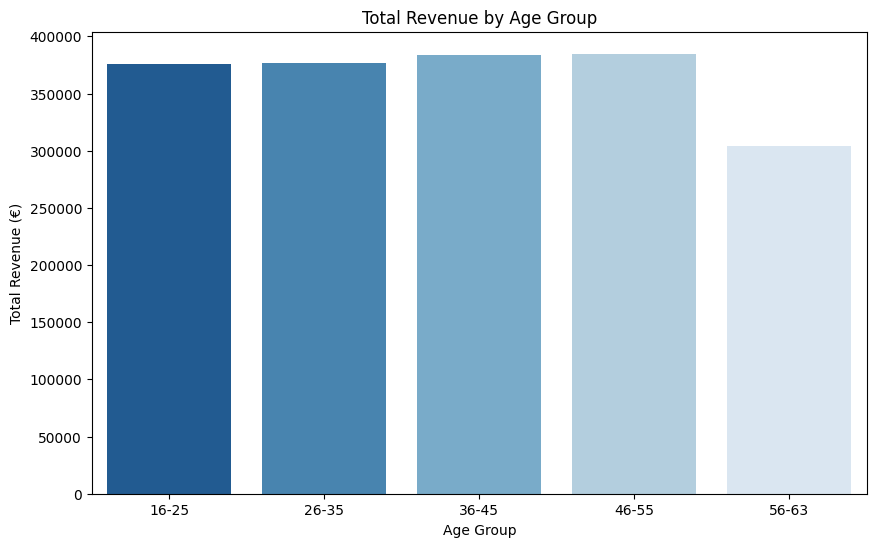

In [24]:
# Aggregate revenue by age group
age_revenue = sales.groupby("Age_Group", observed=False)["Total_Revenue"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=age_revenue, x="Age_Group", y="Total_Revenue", hue="Age_Group", palette="Blues_r", legend=False)

# Add labels and title
plt.title("Total Revenue by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Revenue (€)")

plt.show()



### Insights:
- Revenue Across Most Age Groups is balanced – The 16-55 age groups generate nearly equal total revenue, suggesting that spending habits remain consistent across these demographics.

- Decline in Revenue for 56-63 Age Group, which could indicate lower purchase frequency, reduced engagement, or different spending behaviors.

### Recommendations:

- Increase engagement with personalized offers for the 56-63 age group.

- Determine whether the number of customers in this segment is lower or if they spend less per purchase.

- Consider loyalty programs or discounts to encourage more purchases among the older demographic.

### 1.3 Average Purchase Value per segment of Age/Gender

  Age_Group  Gender  Avg_Purchase_Value
0     16-25  Female           15.833294
1     16-25    Male           16.203138
2     26-35  Female           15.778864
3     26-35    Male           15.583545
4     36-45  Female           16.050130
5     36-45    Male           15.991559
6     46-55  Female           15.916239
7     46-55    Male           16.423881
8     56-63  Female           16.198474
9     56-63    Male           15.833191


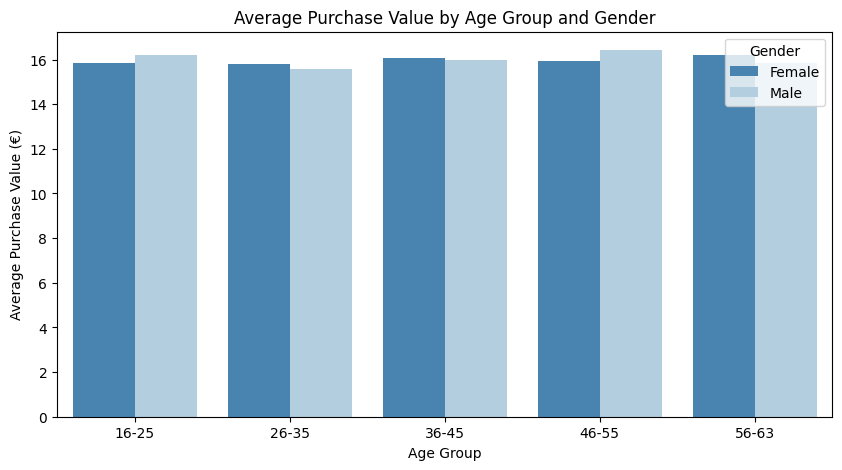

In [46]:
# Group by Age Group and Gender, then calculate the mean purchase value
avg_purchase = sales.groupby(["Age_Group", "Gender"], observed = False)["Last_Purchase_Value"].mean().reset_index()

# Rename for clarity
avg_purchase.rename(columns={"Last_Purchase_Value": "Avg_Purchase_Value"}, inplace=True)

# Display the result
print(avg_purchase)

# Visualize with a barplot
plt.figure(figsize=(10, 5))
sns.barplot(data=avg_purchase, x="Age_Group", y="Avg_Purchase_Value", hue="Gender", palette="Blues_r")

# Add labels and title
plt.title("Average Purchase Value by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Average Purchase Value (€)")
plt.legend(title="Gender")

plt.show()


### Insights:
- Consistent Spending Across Genders and Age Groups – Purchase value is similar for both males and females across age groups, indicating gender and age have little impact on spending behavior.

- Slightly Higher Purchase Value in 46-55 Age Group – The 46-55 age group shows the highest average purchase value, indicating a preference for higher-value products.

- Notable Value in 56-63 Age Group – Though their total revenue might be lower, the 56-63 age group maintains a solid average purchase value of 15, indicating that this group purchases high-value items even if the overall purchase volume is lower.

### Recommendations:
- Target the 46-55 age group with premium or higher-value offerings, as they spend more per transaction.

- Leverage the 56-63 age group by promoting high-value products or services, even if their total revenue contribution is lower.

### 1.4 Repeat Customers vs One-Time Buyers

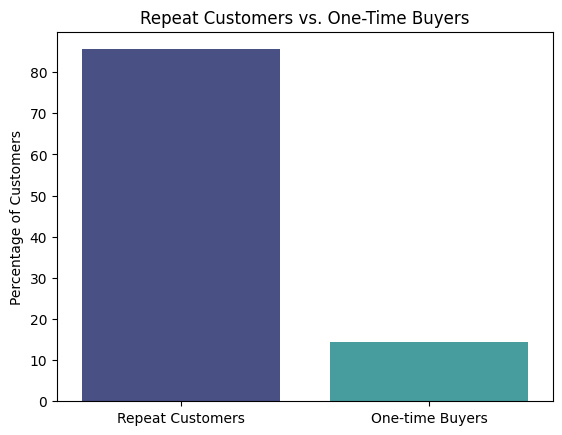

In [51]:
repeat_customers = sales[sales["Total_Purchases"] > 1]  
repeat_rate = len(repeat_customers) / len(sales) * 100  

sns.barplot(x=["Repeat Customers", "One-time Buyers"], y=[repeat_rate, 100-repeat_rate], hue=["Repeat Customers", "One-time Buyers"], palette = "mako")  
plt.title("Repeat Customers vs. One-Time Buyers")  
plt.ylabel("Percentage of Customers")  
plt.show()


### Insights:
- Loyal Customer Base – Large proportion of repeat buyers indicate a strong, loyal customer base, which is critical for long-term success and revenue growth.

- Higher Lifetime Value (LTV) – Repeat buyers typically contribute to a higher lifetime value (LTV), suggesting continued engagement and potentially higher sales over time.

- Repeat customers are more likely to recommend your products/services, which can lead to organic growth and customer acquisition.

### Recommendations:
- Personalize marketing efforts for repeat customers based on their past purchase history to further strengthen loyalty.

- Investigate the reasons behind repeat purchases—do customers come back because of product quality, customer service, or other factors? This can help refine your business strategy.

### 1.5 Most Common Payment Method which generates highest revenue

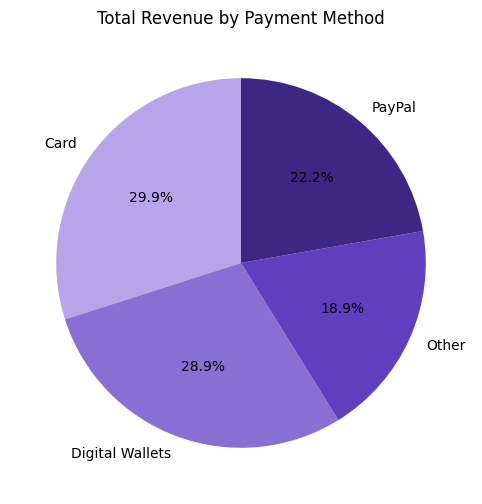

In [27]:
# Group by payment method and sum the revenue  
pay_revenue = sales.groupby("Payment_Method")["Total_Revenue"].sum()  

# Create a pie chart  
plt.figure(figsize=(8, 6))  
plt.pie(pay_revenue, labels=pay_revenue.index, autopct='%1.1f%%', startangle=90, colors=['#B6A6E9','#876FD4','#5E40BE','#3D2785'])  

# Add title  
plt.title("Total Revenue by Payment Method")  

# Display the chart  
plt.show()  

### Insights:
- Card payments are the most popular method, accounting for 29.9% of total revenue
- Electronic payment methods (Card, Digital Wallets, PayPal) collectively represent 81.1% of revenue
- The relatively even distribution indicates customers are comfortable using multiple payment options

### Recommendations:
- The checkout experience for Card and Digital Wallet can be optimised since its users represent nearly 60% of revenue
- Special promotions or loyalty rewards could be offered for Digital Wallet users to further drive adoption
- Consider reducing processing fees by negotiating better rates with payment providers for the highest-volume methods

## 2️⃣ Marketing and Customer Engagement


### 2.1 Time Spent on Website vs Purchase Value

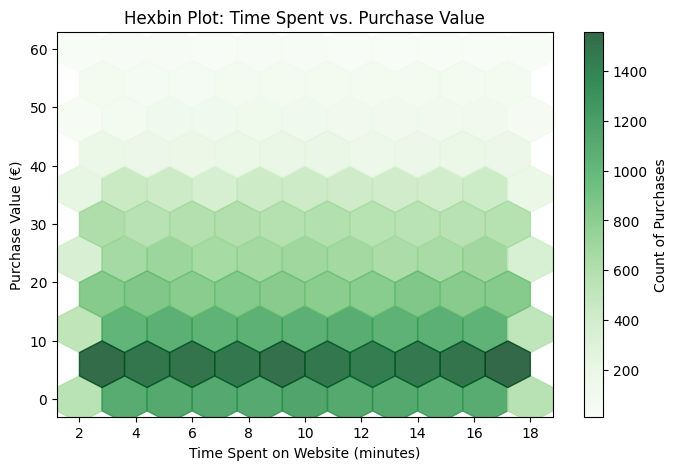

In [28]:
plt.figure(figsize=(8,5))
plt.hexbin(sales["Time_Spent"], sales["Last_Purchase_Value"], gridsize=10, cmap="Greens", alpha=0.8)
plt.colorbar(label="Count of Purchases")

plt.xlabel("Time Spent on Website (minutes)")
plt.ylabel("Purchase Value (€)")
plt.title("Hexbin Plot: Time Spent vs. Purchase Value")

plt.show()


In [29]:
sales[["Time_Spent", "Last_Purchase_Value"]].corr()


,Time_Spent,Last_Purchase_Value
Time_Spent,1.000000,-0.003067
Last_Purchase_Value,-0.003067,1.000000


### Insights
🔹 No meaningful relationship between time spent on the website and purchase value.

🔹 Customers who spend more time do not necessarily make higher purchases.

### 2.2 High-spending Customers' choice of browser

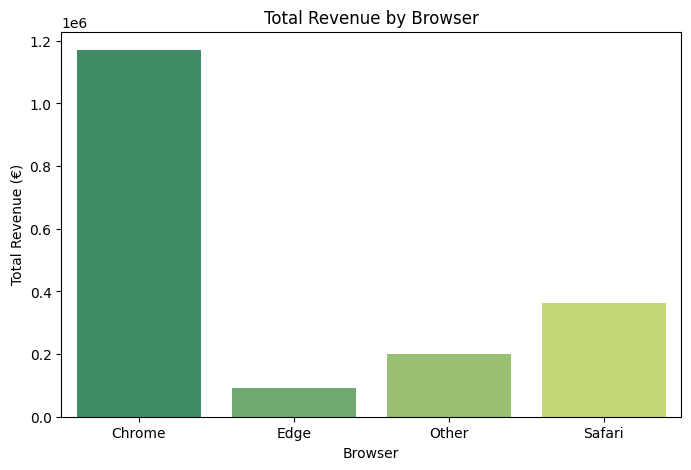

In [30]:
plt.figure(figsize=(8,5))
browser_revenue = sales.groupby("Browser_Choice")["Total_Revenue"].sum().reset_index()
sns.barplot(x="Browser_Choice", y="Total_Revenue", data=browser_revenue, hue = "Browser_Choice", palette = "summer")
plt.xlabel("Browser")
plt.ylabel("Total Revenue (€)")
plt.title("Total Revenue by Browser")
plt.show()


### Insights of the visual:
- Chrome dominates in revenue and popularity, hence its optimisation can be prioritied.
- Edge suggests being a low-revenue browser which may relate to poor user experience



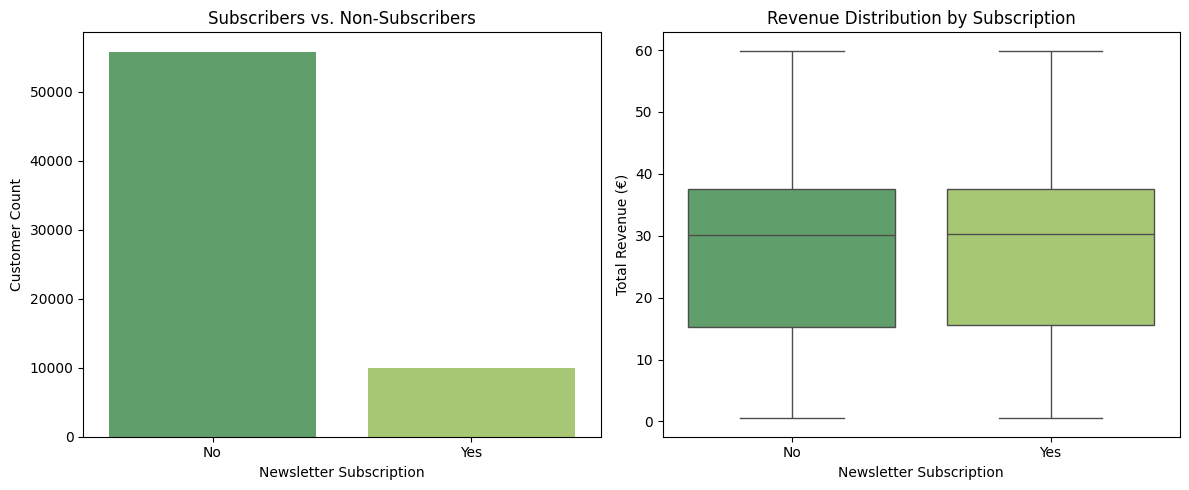

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create two subplots side by side

# 📊 Bar Chart: Subscriber Count
sns.countplot(x="Newsletter_Subscription", data=sales, hue="Newsletter_Subscription", palette="summer", ax=axes[0])
axes[0].set_xlabel("Newsletter Subscription")
axes[0].set_ylabel("Customer Count")
axes[0].set_title("Subscribers vs. Non-Subscribers")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["No", "Yes"])

# 📦 Box Plot: Revenue Distribution by Subscription
sns.boxplot(x="Newsletter_Subscription", y="Total_Revenue", hue= "Newsletter_Subscription", data=sales, palette="summer", ax=axes[1])
axes[1].set_xlabel("Newsletter Subscription")
axes[1].set_ylabel("Total Revenue (€)")
axes[1].set_title("Revenue Distribution by Subscription")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["No", "Yes"])

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


### Insights
- The majority of customers do not subscribe to the newsletter.
- Revenue distribution is similar for both subscribers and non-subscribers.
- The spread of revenue values is wide, meaning both groups have a mix of high- and low-spending customers.
Newsletter subscription doesn’t have a strong impact on revenue per customer—at least not in this dataset.




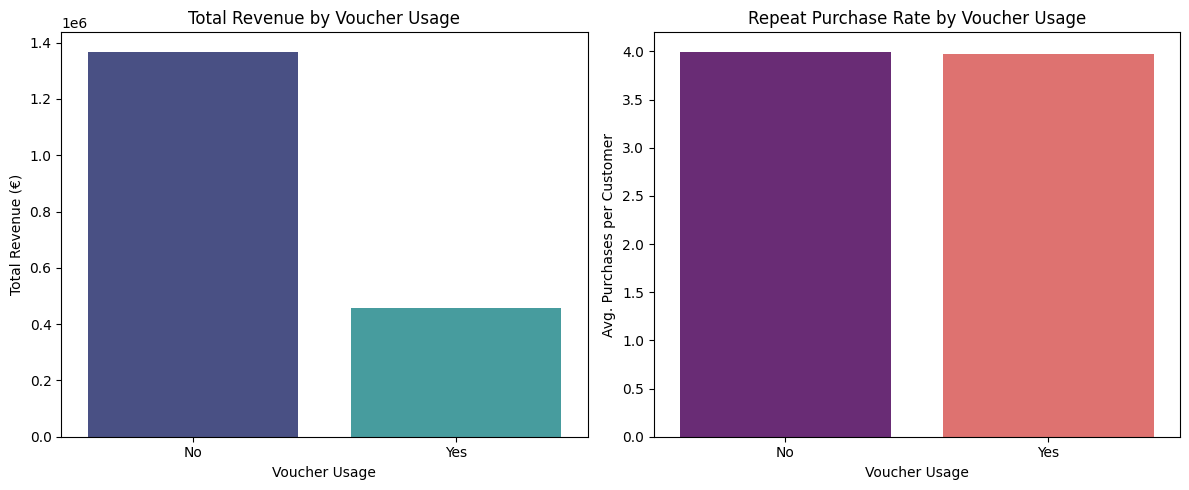

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Total Revenue by Voucher Usage
voucher_revenue = sales.groupby("Voucher_Usage")["Total_Revenue"].sum().reset_index()
sns.barplot(x="Voucher_Usage", y="Total_Revenue", data=voucher_revenue, hue = "Voucher_Usage", palette="mako", ax=axes[0])
axes[0].set_xlabel("Voucher Usage")
axes[0].set_ylabel("Total Revenue (€)")
axes[0].set_title("Total Revenue by Voucher Usage")

# Repeat Purchase Rate by Voucher Usage
repeat_voucher = sales.groupby("Voucher_Usage")["Total_Purchases"].mean().reset_index()
sns.barplot(x="Voucher_Usage", y="Total_Purchases", data=repeat_voucher, hue = "Voucher_Usage", palette="magma", ax=axes[1])
axes[1].set_xlabel("Voucher Usage")
axes[1].set_ylabel("Avg. Purchases per Customer")
axes[1].set_title("Repeat Purchase Rate by Voucher Usage")

plt.tight_layout()
plt.show()



### Insights from the Visuals:

- Vouchers lower revenue per transaction but do not necessarily increase customer loyalty. 
- Non-voucher users drive more revenue, making them a higher-value segment.
- Consider targeting voucher campaigns strategically to avoid revenue loss without strong repeat purchase benefits.
This implies that vouchers do not significantly impact customer retention—users return at similar rates regardless of whether they used a voucher.
- This implies that vouchers do not significantly impact customer retention—users return at similar rates regardless of whether they used a voucher.

## 3️⃣ Purchase Trends and Seasonal Insights 

### 3.1 Monthly and Seasonal Sales Analysis

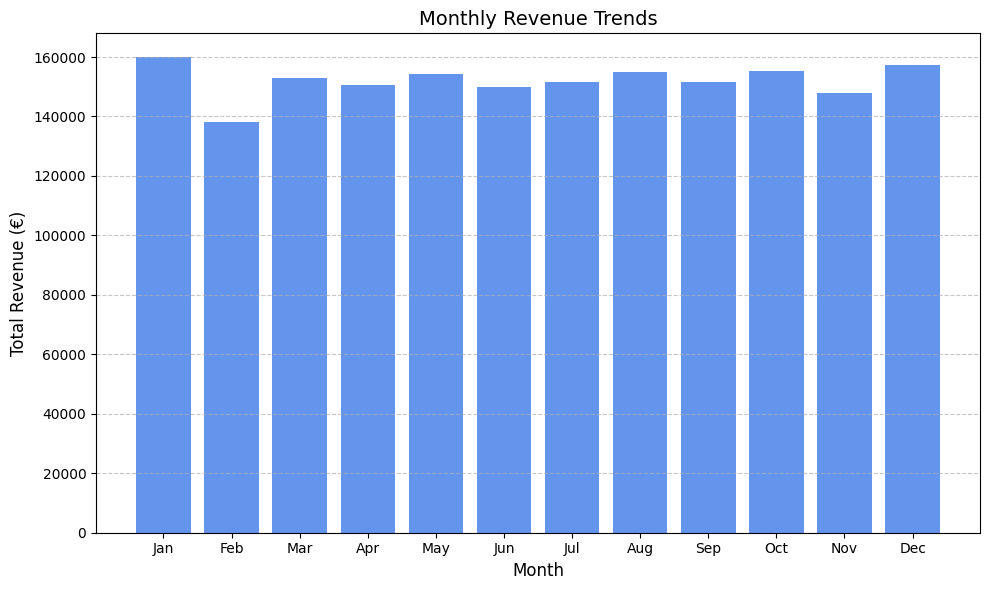

In [37]:

# Extract Month Number
sales['Month'] = sales['Last_Purchase_Date'].dt.month

# Aggregate Revenue by Month
monthly_sales = sales.groupby("Month")["Total_Revenue"].sum()

# Define Month Names Mapping
month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Reindex and Map Month Names for Proper Order
monthly_sales = monthly_sales.reindex(range(1, 13))  # Ensure months are in correct order
monthly_sales.index = monthly_sales.index.map(month_names)  # Convert to names

# Plot
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales.index, monthly_sales.values, color='cornflowerblue')
plt.title("Monthly Revenue Trends", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue (€)", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Insights:
- There's a clear seasonal pattern with higher revenues in January, December, and March-May, while February and November show the lowest revenue figures.
- Holiday shopping effect: The December and January peaks likely indicate strong holiday season shopping and post-holiday sales or gift card redemptions.
- Stable mid-year performance: There's relative stability during the middle months (April through September), with revenue consistently between €150,000-155,000.

### Recommendations:
#### Potential for targeted marketing: The February and November dips present opportunities for promotional campaigns to boost sales during traditionally slower periods.

### 3.2 Revenue Distribution acorss the Week

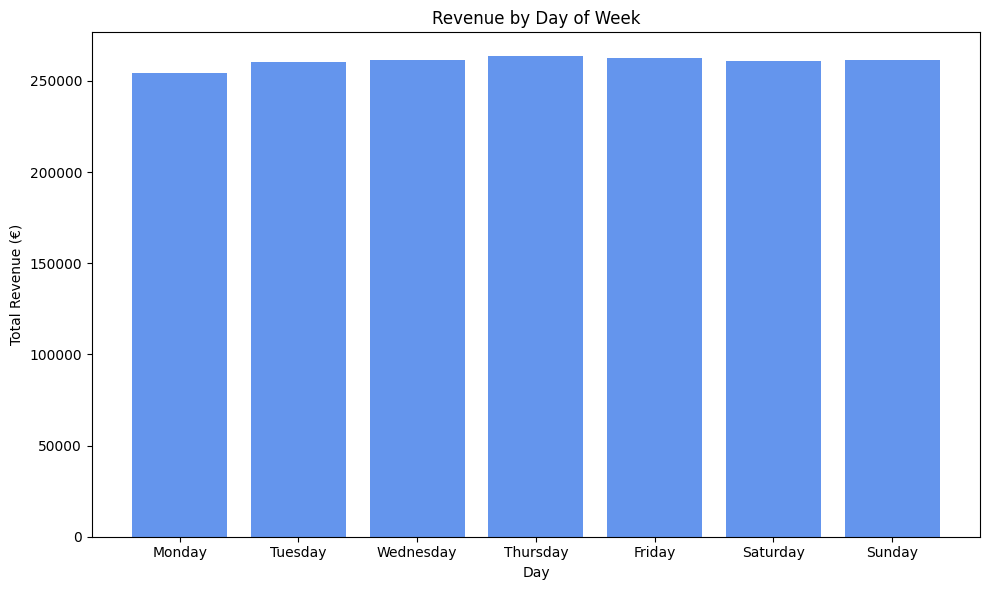

In [38]:
# Extract day of week
sales['Day_of_Week'] = sales['Last_Purchase_Date'].dt.day_name()

# Group by day of week and sum revenue
day_sales = sales.groupby('Day_of_Week')['Total_Revenue'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot
plt.figure(figsize=(10, 6))
plt.bar(day_sales.index, day_sales.values, color="cornflowerblue")
plt.title('Revenue by Day of Week')
plt.xlabel('Day')
plt.ylabel('Total Revenue (€)')
plt.tight_layout()
plt.show()

### 3.3 Daily Revenue Trends across the Year

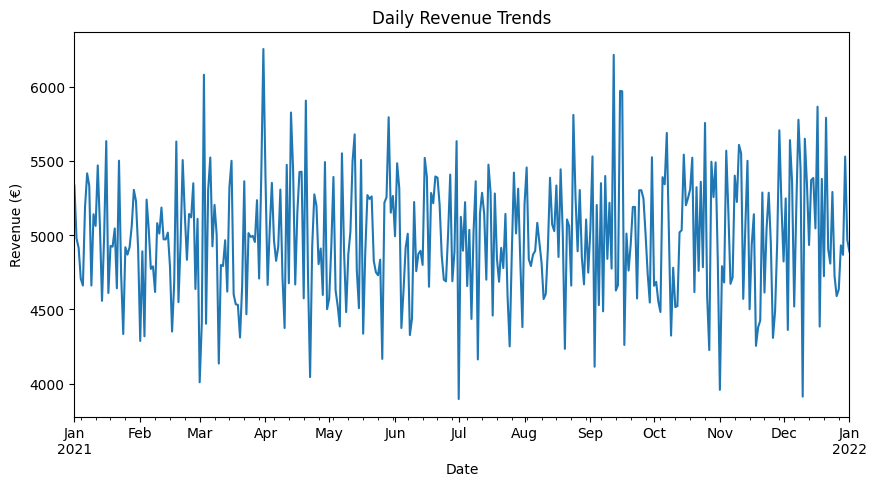

In [36]:
sales.set_index("Last_Purchase_Date")["Total_Revenue"].resample("D").sum().plot(figsize=(10,5))
plt.title("Daily Revenue Trends")
plt.ylabel("Revenue (€)")
plt.xlabel("Date")
plt.show()

### Insights:
- While daily revenue shows high volatility, the day-of-week aggregation reveals consistent weekly patterns
- The business maintains steady performance regardless of weekday/weekend distinction
- Daily spikes likely represent promotional events or other special circumstances rather than day-of-week effects
- The business model appears resilient to typical weekly shopping patterns that affect many retailers

<center> End of Analysis </center>